### Backtest of trivial long/short strategy; Sharpe Ratio 

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

tickers = ['AAPL', 'MSFT', 'JPM', 'ADBE', 'AMD', 'ACN', 'GOOGL', 'AMZN', 'AAL',\
        'AEE', 'AXP', 'AEP', 'AWK', 'APA', 'AMAT', 'BA', 'BLK', 'BAC', 'CHD', 'KO']
tickers_str = ' '.join(tickers)
print(f'Universe = {tickers_str}')

df = yf.download(tickers_str, period='5y')['Close']
df = (df-df.mean())/df.std()

def compute_pnl(short, long, idx_t0, idx_t1):
    # 6M returns
    return (df[short].iloc[idx_t0]-df[short].iloc[idx_t1]).sum(), (df[long].iloc[idx_t1]-df[long].iloc[idx_t0]).sum()

def get_short_long(idate, shift):  
    # short 5 with lowest close 6 month returns, long 5 with highest
    date = df.index[idate]
    ret = (df.loc[:date]-df.loc[:date].shift(shift)) / df.loc[:date].shift(shift)
    ret_mean = ret.mean()
    long = ret_mean.nlargest().index
    short = ret_mean.nsmallest().index
    return short, long

shift = 5
n = 100
idx = [150+shift*i for i in range(n)]
short, long = get_short_long(idx[0], shift)
pnl = []
for i in range(n-1):
    spnl, lpnl = compute_pnl(short, long, idx[i], idx[i+1])
    pnl.append(spnl+lpnl)

def compute_Sharpe(pnl): # current risk-free rate = 5%
    print('Risk', np.std(pnl))
    print('Expected returns', np.mean(pnl))
    return (np.mean(pnl)-0.05) / np.std(pnl)


print(f'pnl = {pnl}')
print(f'Sharpe Ratio = {compute_Sharpe(pnl)}')



Universe = AAPL MSFT JPM ADBE AMD ACN GOOGL AMZN AAL AEE AXP AEP AWK APA AMAT BA BLK BAC CHD KO
[*********************100%%**********************]  20 of 20 completed
pnl = [0.015399930321438327, 1.0485865849671907, -0.23981671452511355, 0.22394689127179948, 0.374853625737736, 0.2122068209613936, -0.35467194879110786, -0.8402952194579741, -0.744848525961105, 0.5644691085392497, -0.3521059543924099, 1.274330431892076, 0.14422143263646003, -0.5756668783766064, -0.4528844343206519, 0.1087571844527579, 1.154187946135829, -0.3525910925046434, 0.9076946437615901, 0.8439409366859966, 1.4811733144481574, -0.43748687540737474, 0.09737304686770398, -0.08514417108464689, -0.16981636036252262, -0.12362138311038606, -0.5534383038270063, 0.5346433528184238, -0.945486658866706, -1.3989311775842772, -1.2845908812851061, -0.8928424818479348, 1.0339380093879307, -0.933993067557216, -0.0903356383076761, -0.24011886504216218, -1.6603201546162658, 4.192300559021573, 2.1039749071214007, -3.8062551846898995,

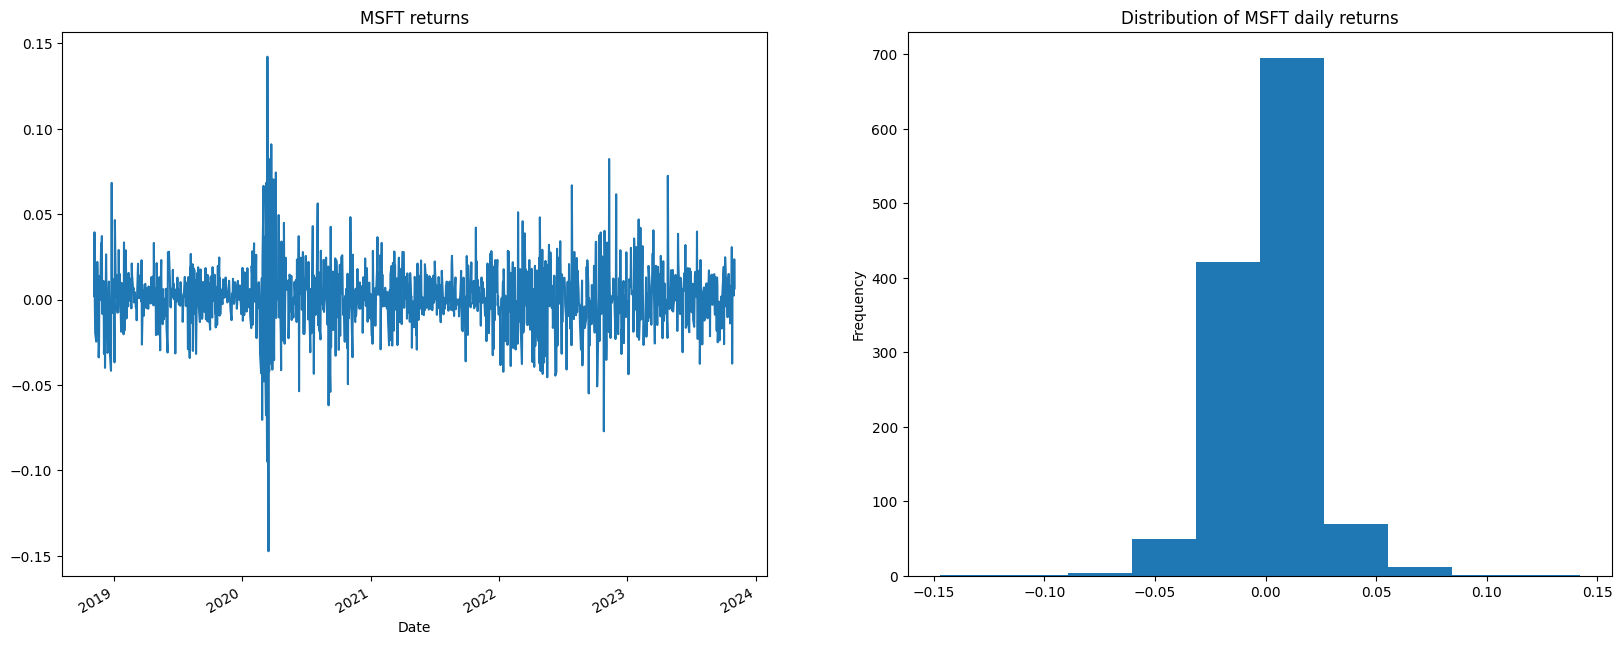

In [28]:
import yfinance as yf

msft = yf.Ticker('MSFT')

df = msft.history(period='5y')['Close']

ret = (df-df.shift(1)) / df.shift(1)

import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 2, figsize=(20, 8)) 

ret.plot(title='MSFT returns', ax=ax[0])
ret.plot.hist(title='Distribution of MSFT daily returns', ax=ax[1])

plt.show()

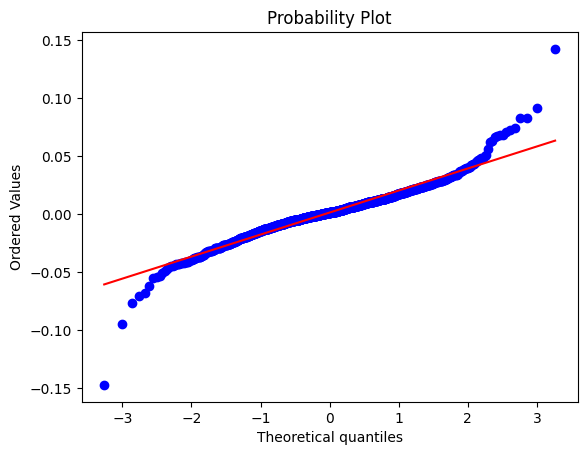

In [38]:
import scipy.stats as st

ret.dropna(inplace=True)
st.probplot(ret, dist='norm', plot=plt)

plt.show() # not normally distributed. 